In [82]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [83]:
df = pd.read_csv("cardio_train.csv", delimiter=";").drop("id", axis=1)
df.shape

(70000, 12)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [85]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [86]:
df["age"] = (df["age"]/365).round()

In [87]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [88]:
df.shape

(70000, 12)

### a) Hur många är positiva för häart-kärlsjukdom och hur många är negativa?

In [89]:
df["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

### b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden?


In [90]:
chol_list = df["cholesterol"].value_counts()
type(chol_list) # pandas.core.series.Series

for i in range(1, 4):
    print(f"Andel: {i}. {chol_list[i]/len(df):.1%}")
chol_list[2]

Andel: 1. 74.8%
Andel: 2. 13.6%
Andel: 3. 11.5%


9549

Text(0.5, 1.0, 'Procentage(%) of Cholesterol')

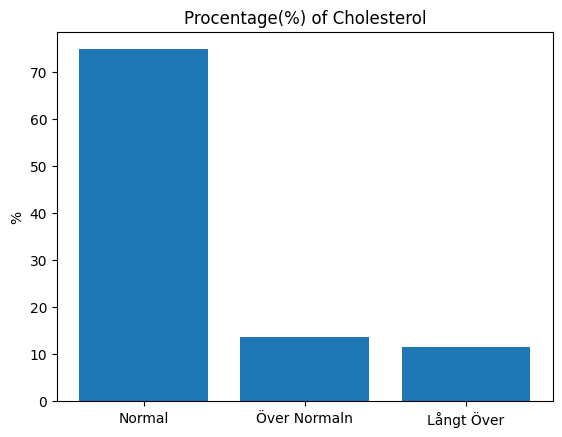

In [91]:
plt.bar(['Normal', 'Över Normaln', "Långt Över"], [chol_list[1]/len(df)*100, chol_list[2]/len(df)*100, chol_list[3]/len(df)*100])
plt.ylabel('%')
plt.title('Procentage(%) of Cholesterol')

In [92]:
df["cholesterol"].value_counts()

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

###  c) Hur ser åldersfördelningen ut?

In [93]:
df_age = (df["age"]/365).round(1)

In [94]:
df["age"].nsmallest()/365

6219     0.082192
22343    0.082192
30666    0.082192
55905    0.082192
118      0.106849
Name: age, dtype: float64

In [95]:
df.shape

(70000, 12)

In [96]:
age_filter = df["age"] > 39
df = df[age_filter]

In [97]:
df.shape

(69587, 12)

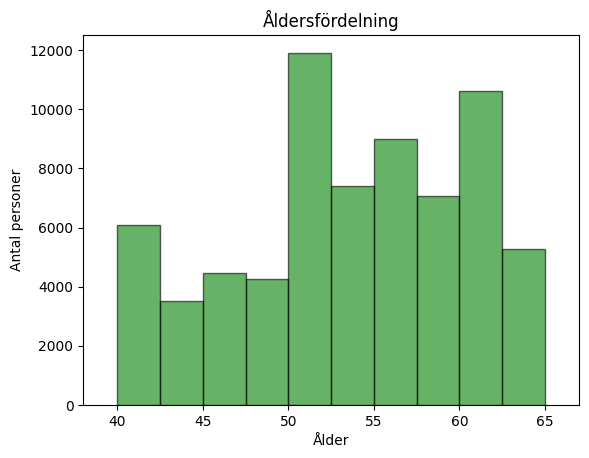

In [98]:
plt.hist(df["age"], bins=10, color='green', edgecolor='black', alpha=0.6)
plt.xlim(38, 67)

plt.title('Åldersfördelning')
plt.xlabel('Ålder')
plt.ylabel('Antal personer')
plt.show()

### d) Hur stor andel röker?

In [99]:
smokers = df[df["smoke"] == 1]
smoke_prop = len(smokers) / len(df)

print(f"{smoke_prop = :.2%}")

smoke_prop = 8.80%


### e) Hur ser viktfördelningen ut?


In [100]:
df["weight"].count()

69587

In [101]:
weight_filter = df["weight"] > 45
df = df[weight_filter]

In [102]:
df.shape

(69166, 12)

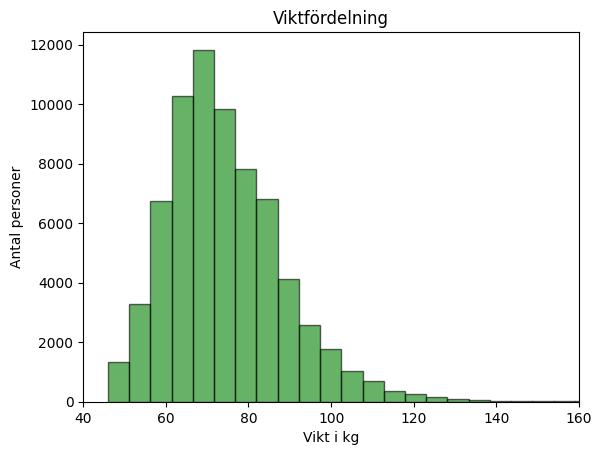

In [103]:
plt.hist(df["weight"], bins=30, color='green', edgecolor='black', alpha=0.6)
plt.xlim(40, 160)

plt.title('Viktfördelning')
plt.xlabel('Vikt i kg')
plt.ylabel('Antal personer')
plt.show()

### f) Hur ser längdfördelningen ut?

In [104]:
height_filter = df["height"] > 145
df = df[height_filter]

In [105]:
df.shape

(68699, 12)

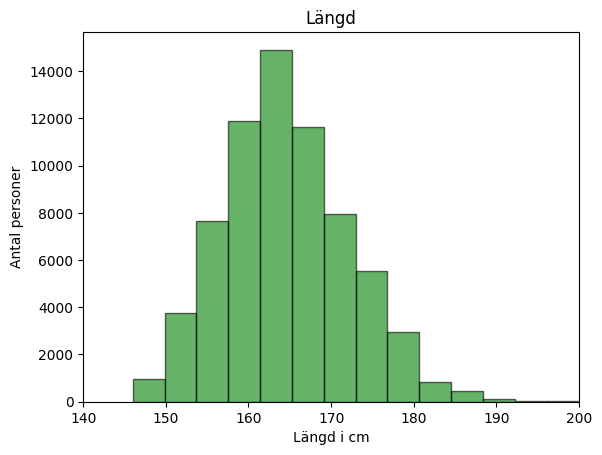

In [106]:
plt.hist(df["height"], bins=27, color='green', edgecolor='black', alpha=0.6)

plt.xlim(140, 200)

plt.title('Längd')
plt.xlabel('Längd i cm')
plt.ylabel('Antal personer')
plt.show()

### g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?

In [107]:
women = df[df["gender"] == 1]
men = df[df["gender"] == 2]

num_women_cardio = len(women[women["cardio"] == 1])
num_men_cardio = len(men[men["cardio"] == 1])

print(f"{num_women_cardio = } | {num_men_cardio = }")

print(f"{num_women_cardio/len(df) = :.2%} | {num_men_cardio/len(df) = :.2%}")

num_women_cardio = 22203 | num_men_cardio = 12290
num_women_cardio/len(df) = 32.32% | num_men_cardio/len(df) = 17.89%


Text(0.5, 1.0, 'Procentage(%) of cardiovascular disease by gender')

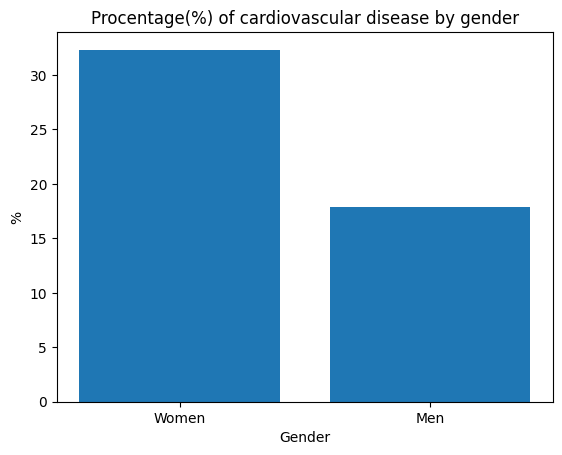

In [108]:
plt.bar(['Women', 'Men'], [(num_women_cardio/len(df))*100, (num_men_cardio/len(df)*100)])
plt.xlabel('Gender')
plt.ylabel('%')
plt.title('Procentage(%) of cardiovascular disease by gender')

# !!!!!!!!!!!!!! Sammanfatta dina resultat och presentera dem i en notebook. Anv¨and markdown boxar f¨or l¨opande text.

# 1.2 Modelldesign

In [109]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.021577,-0.084912,0.055707,0.019899,0.017117,0.153333,0.098428,-0.048630,-0.028779,-0.010688,0.233575
gender,-0.021577,1.000000,0.525180,0.149954,0.005812,0.014880,-0.035132,-0.020660,0.337794,0.170969,0.005593,0.008223
height,-0.084912,0.525180,1.000000,0.297429,0.004979,0.004952,-0.055092,-0.022432,0.196763,0.097891,-0.009447,-0.012874
weight,0.055707,0.149954,0.297429,1.000000,0.030059,0.044055,0.144625,0.107889,0.065391,0.065766,-0.016007,0.180607
ap_hi,0.019899,0.005812,0.004979,0.030059,1.000000,0.015845,0.023484,0.011613,-0.000966,0.001448,-0.000090,0.053808
ap_lo,0.017117,0.014880,0.004952,0.044055,0.015845,1.000000,0.023738,0.010497,0.005346,0.010872,0.005039,0.064748
cholesterol,0.153333,-0.035132,-0.055092,0.144625,0.023484,0.023738,1.000000,0.451510,0.011020,0.036264,0.009238,0.219936
gluc,0.098428,-0.020660,-0.022432,0.107889,0.011613,0.010497,0.451510,1.000000,-0.004971,0.011296,-0.006796,0.087474
smoke,-0.048630,0.337794,0.196763,0.065391,-0.000966,0.005346,0.011020,-0.004971,1.000000,0.340376,0.025635,-0.015075
alco,-0.028779,0.170969,0.097891,0.065766,0.001448,0.010872,0.036264,0.011296,0.340376,1.000000,0.025084,-0.006734


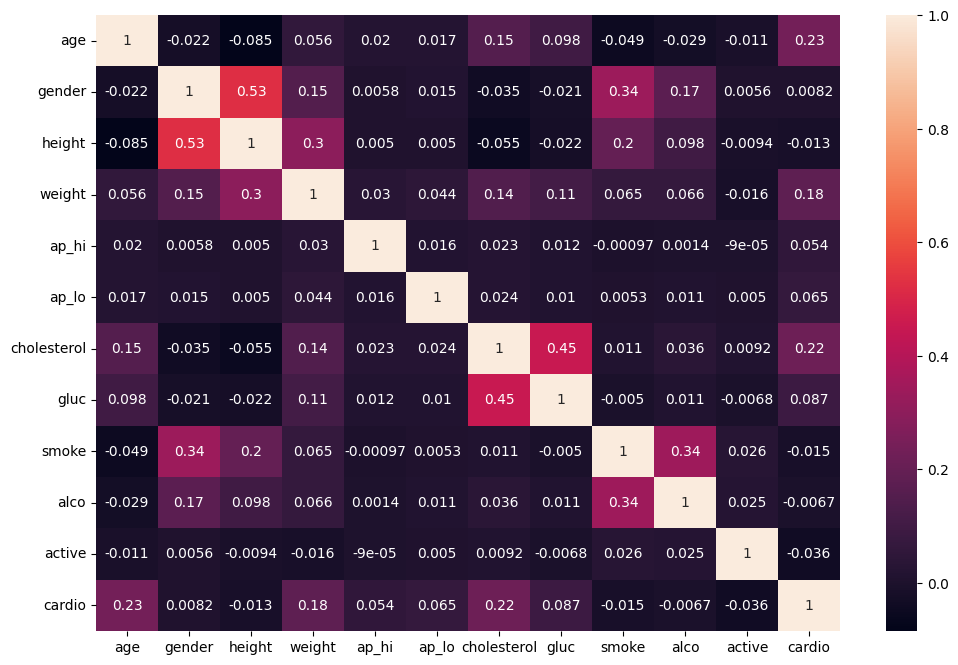

In [110]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# 1.2.1 Feature Engineering

$$BMI = \frac{kg}{m^2}$$


In [111]:
bmi_data = {
    'Category': [
        'Normal range',
        'Overweight (Pre-obese)',
        'Obese (Class I)',
        'Obese (Class II)',
        'Obese (Class III)'
    ],
    'BMI (kg/m2)[c]': [
        '18.5 – 24.9',
        '25.0 – 29.9',
        '30.0 – 34.9',
        '35.0 – 39.9',
        '≥ 40.0'
    ]
}

tabell_bmi = pd.DataFrame(bmi_data)
tabell_bmi

,Category,BMI (kg/m2)[c]
0,Normal range,18.5 – 24.9
1,Overweight (Pre-obese),25.0 – 29.9
2,Obese (Class I),30.0 – 34.9
3,Obese (Class II),35.0 – 39.9
4,Obese (Class III),≥ 40.0


In [112]:
df["BMI"] = df["weight"] / (df["height"]/100)**2
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


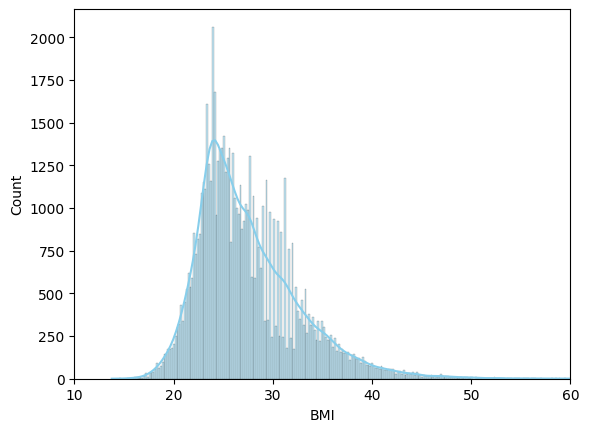

In [113]:
sns.histplot(df["BMI"], kde=True, bins=300, color='skyblue')
plt.xlim(10, 60)

plt.show()

### a) Sl¨ang de samples med orimliga BMIer och outliers. Notera att detta kanvara sv˚art att avg¨ora i vilket range av BMIer som vi ska spara. Beskriv hur du kommer fram till gr¨anserna, med resonemang eller referens.

In [114]:
df.shape

(68699, 13)

In [115]:
tabell_bmi

,Category,BMI (kg/m2)[c]
0,Normal range,18.5 – 24.9
1,Overweight (Pre-obese),25.0 – 29.9
2,Obese (Class I),30.0 – 34.9
3,Obese (Class II),35.0 – 39.9
4,Obese (Class III),≥ 40.0


### b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese (class II), obese (class III).

In [116]:
bmi_bins = [18.5, 25, 30, 35, 40, float('inf')]

# Definiera kategorierna för varje BMI-intervall
bmi_categories = ['Normal range', 'Overweight', 'Obese (Class 1)', 
                  'Obese (Class 2)', 'Obese (Class 3)']

# Skapa en ny kolumn "class_BMI" baserat på kategoriseringen av BMI-värden
df["class_BMI"] = pd.cut(df["BMI"], bins=bmi_bins, labels=bmi_categories, right=False)

# Visa de första några raderna i den uppdaterade DataFrame:n
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,class_BMI
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal range
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese (Class 1)
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal range
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal range


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68699 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          68699 non-null  float64 
 1   gender       68699 non-null  int64   
 2   height       68699 non-null  int64   
 3   weight       68699 non-null  float64 
 4   ap_hi        68699 non-null  int64   
 5   ap_lo        68699 non-null  int64   
 6   cholesterol  68699 non-null  int64   
 7   gluc         68699 non-null  int64   
 8   smoke        68699 non-null  int64   
 9   alco         68699 non-null  int64   
 10  active       68699 non-null  int64   
 11  cardio       68699 non-null  int64   
 12  BMI          68699 non-null  float64 
 13  class_BMI    68314 non-null  category
dtypes: category(1), float64(3), int64(10)
memory usage: 7.4 MB


In [118]:
df.dropna(inplace=True)
len(df)

68314

### c) Unders¨ok om kategorin ¨ar relevant, dvs dess korrelationer. Uppdatera data-analysen om du hittar n˚agot intressant.

#### c) Unders¨ok om kategorin ¨ar relevant, dvs dess korrelationer. Uppdatera data-analysen om du hittar n˚agot intressant.

BMI påverkar Cardio med 0.19, kan vara  nåt intressant ???????

### Skapa en feature f¨or blodtryckskategorier enligt tabellen i denna artikel.
a) Sl¨ang bort samples med orimliga blodtryck och outliers. Likt f¨orra uppgiften ¨ar det inte trivialt att s¨atta gr¨anserna. Beskriv hur du kommer fram
till gr¨anserna. https://www.ncbi.nlm.nih.gov/books/NBK570233/table/ch1.tab1/

In [119]:
print(df.shape)

(68314, 14)


In [120]:
filter_outliers_ap = ((df["ap_hi"] > 70) & (df["ap_hi"] < 250) & (df["ap_lo"] > 40) & (df["ap_lo"] < 150))
df = df[filter_outliers_ap]

df.shape

(67054, 14)

In [121]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,class_BMI
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal range
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese (Class 1)
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal range
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal range


### b) Skapa en kategorisk feature med relevanta kategorier. https://www.ncbi.nlm.nih.gov/books/NBK570233/table/ch1.tab1/
https://en.wikipedia.org/wiki/Blood_pressure

In [122]:
# Skapa villkor för att definiera kategorierna
conditions = [
    (df["ap_hi"] < 90) | (df["ap_lo"] < 60),   # low_press
    (df["ap_hi"] >= 140) | (df["ap_lo"] > 90), # High_press
    (df["ap_hi"] <= 120) & (df["ap_lo"] <= 80),  # normal_press
    ((df["ap_hi"] > 120) & (df["ap_hi"] < 140)) | ((df["ap_lo"] > 80) & (df["ap_lo"] < 90)) # High_norm
]

# Definiera kategorierna
categories = ["low_press", "high_press", "normal_press", "high_normal"]

# Skapa den nya kolumnen baserad på villkoren och kategorierna
df["class_bl_press"] = np.select(conditions, categories, default=None)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67054 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             67054 non-null  float64 
 1   gender          67054 non-null  int64   
 2   height          67054 non-null  int64   
 3   weight          67054 non-null  float64 
 4   ap_hi           67054 non-null  int64   
 5   ap_lo           67054 non-null  int64   
 6   cholesterol     67054 non-null  int64   
 7   gluc            67054 non-null  int64   
 8   smoke           67054 non-null  int64   
 9   alco            67054 non-null  int64   
 10  active          67054 non-null  int64   
 11  cardio          67054 non-null  int64   
 12  BMI             67054 non-null  float64 
 13  class_BMI       67054 non-null  category
 14  class_bl_press  65752 non-null  object  
dtypes: category(1), float64(3), int64(10), object(1)
memory usage: 7.7+ MB


In [124]:
df["class_bl_press"].value_counts()

class_bl_press
normal_press    37635
high_press      18472
high_normal      9463
low_press         182
Name: count, dtype: int64

In [125]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,class_BMI,class_bl_press
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal range,normal_press
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese (Class 1),high_press
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal range,high_normal
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight,high_press
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal range,normal_press


In [126]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65752 entries, 0 to 65751
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             65752 non-null  float64 
 1   gender          65752 non-null  int64   
 2   height          65752 non-null  int64   
 3   weight          65752 non-null  float64 
 4   ap_hi           65752 non-null  int64   
 5   ap_lo           65752 non-null  int64   
 6   cholesterol     65752 non-null  int64   
 7   gluc            65752 non-null  int64   
 8   smoke           65752 non-null  int64   
 9   alco            65752 non-null  int64   
 10  active          65752 non-null  int64   
 11  cardio          65752 non-null  int64   
 12  BMI             65752 non-null  float64 
 13  class_BMI       65752 non-null  category
 14  class_bl_press  65752 non-null  object  
dtypes: category(1), float64(3), int64(10), object(1)
memory usage: 7.1+ MB


In [127]:
df_encoded = pd.get_dummies(df, columns = ["class_BMI", "class_bl_press"], dtype=int)
df_encoded.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,BMI,class_BMI_Normal range,class_BMI_Overweight,class_BMI_Obese (Class 1),class_BMI_Obese (Class 2),class_BMI_Obese (Class 3),class_bl_press_high_normal,class_bl_press_high_press,class_bl_press_low_press,class_bl_press_normal_press
0,50.0,2,168,62.0,110,80,1,1,0,0,...,21.967120,1,0,0,0,0,0,0,0,1
1,55.0,1,156,85.0,140,90,3,1,0,0,...,34.927679,0,0,1,0,0,0,1,0,0
2,52.0,1,165,64.0,130,70,3,1,0,0,...,23.507805,1,0,0,0,0,1,0,0,0
3,48.0,2,169,82.0,150,100,1,1,0,0,...,28.710479,0,1,0,0,0,0,1,0,0
4,48.0,1,156,56.0,100,60,1,1,0,0,...,23.011177,1,0,0,0,0,0,0,0,1


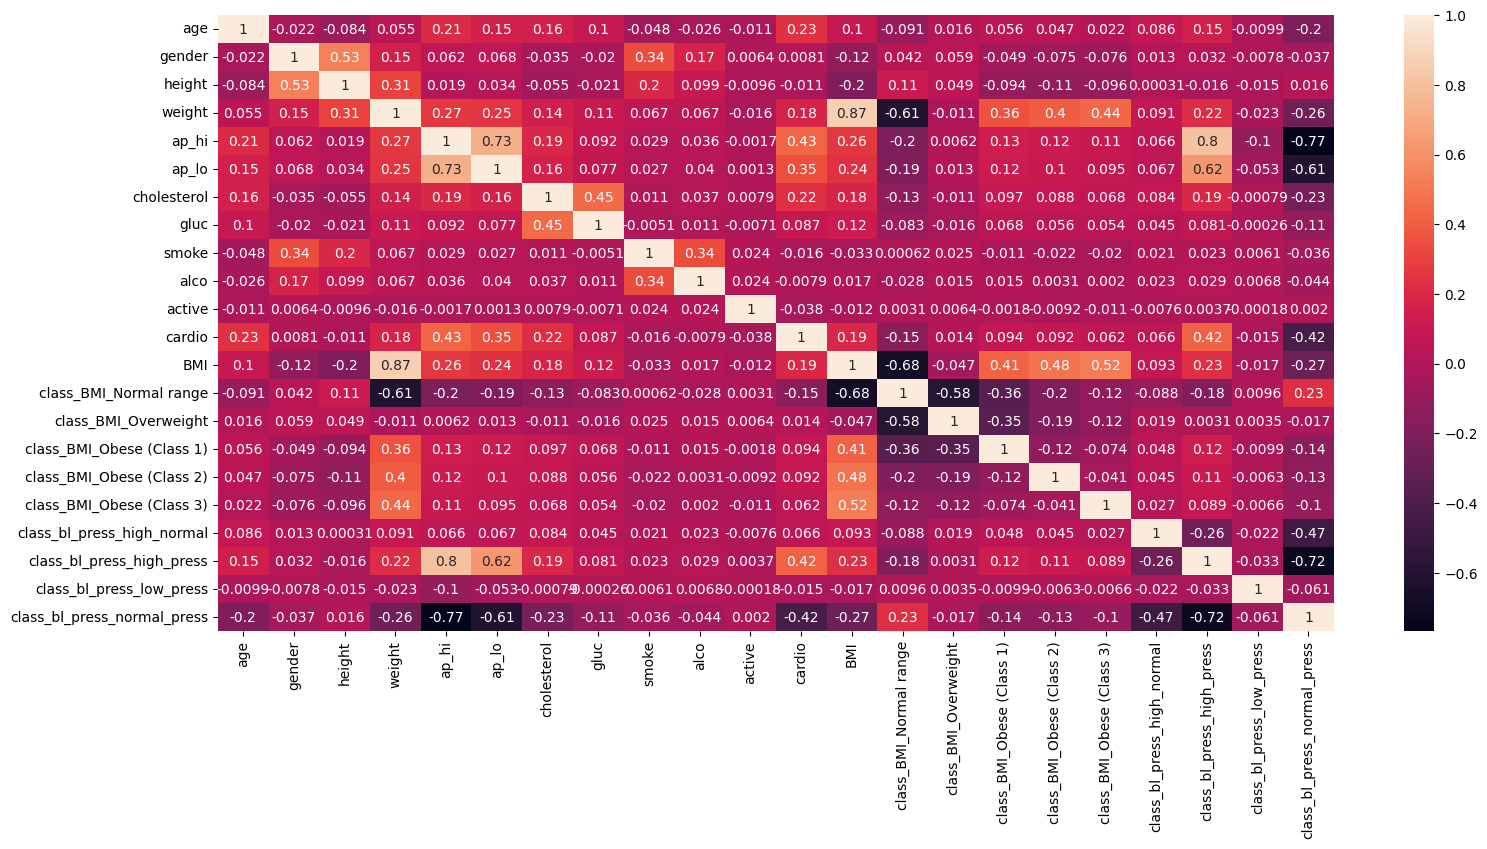

In [128]:
plt.figure(figsize=(18, 8))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

# !!!!!!!!!!!!!!!!!!!!!!!!!!
## Enligt vår heatmap fick vi veta att på "Cardio" dvs hjärtsjukdomar påverkar följande kolumner: high_bl_press, BMI, chol, weight och age.

###   ap_High på cardio ??????????????????????

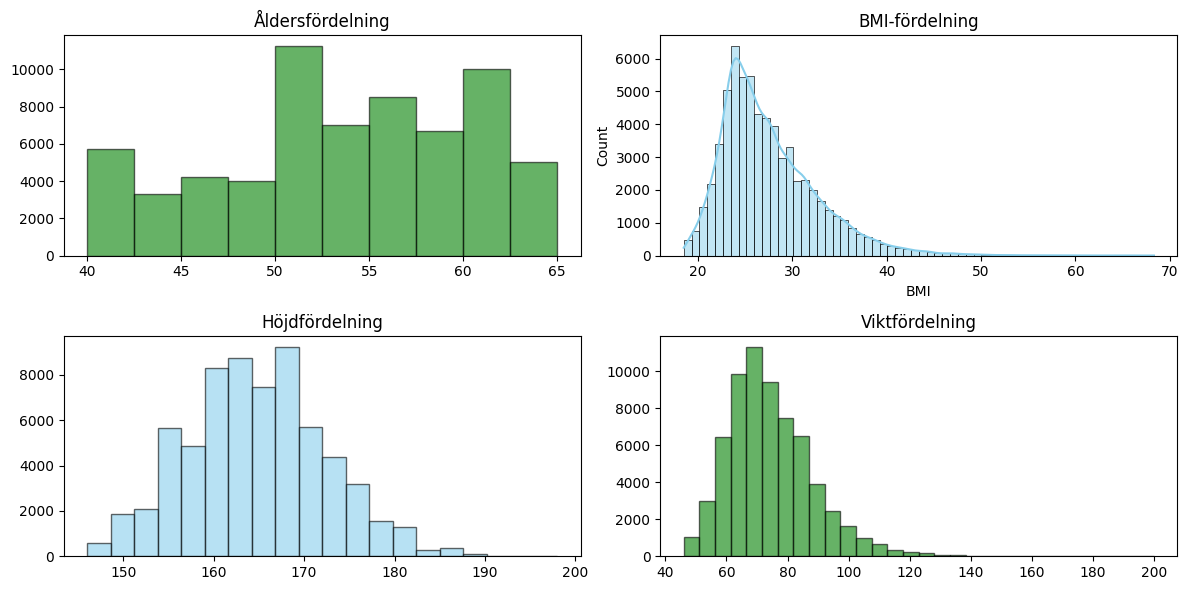

In [129]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))


# Plotta histogram för df_age
axs[0, 0].hist(df["age"], bins=10, color='green', edgecolor='black', alpha=0.6)
axs[0, 0].set_title('Åldersfördelning')


# Plotta histogram för BMI
sns.histplot(df["BMI"], kde=True, bins=60, color='skyblue', ax=axs[0, 1])
axs[0, 1].set_title('BMI-fördelning')


# Plotta histogram för height
axs[1, 0].hist(df["height"], bins=20, color='skyblue', edgecolor='black', alpha=0.6)
axs[1, 0].set_title('Höjdfördelning')


# Plotta histogram för weight
axs[1, 1].hist(df["weight"], bins=30, color='green', edgecolor='black', alpha=0.6)
axs[1, 1].set_title('Viktfördelning')



# Justera layout
plt.tight_layout()

# Visa plotten
plt.show()

# 1.2.2 Skapa tv˚a dataset


# df_1

In [130]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,class_BMI,class_bl_press
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal range,normal_press
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese (Class 1),high_press
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal range,high_normal
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight,high_press
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal range,normal_press


In [131]:
df_1 = df.drop(["ap_hi", "ap_lo", "height", "weight", "BMI"], axis = "columns")
df_1.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,class_BMI,class_bl_press
0,50.0,2,1,1,0,0,1,0,Normal range,normal_press
1,55.0,1,3,1,0,0,1,1,Obese (Class 1),high_press
2,52.0,1,3,1,0,0,0,1,Normal range,high_normal
3,48.0,2,1,1,0,0,1,1,Overweight,high_press
4,48.0,1,1,1,0,0,0,0,Normal range,normal_press


In [132]:
encod_df_1 = pd.get_dummies(df_1, columns = ["class_BMI", "class_bl_press", "gender"], dtype=int)
encod_df_1.head()

,age,cholesterol,gluc,smoke,alco,active,cardio,class_BMI_Normal range,class_BMI_Overweight,class_BMI_Obese (Class 1),class_BMI_Obese (Class 2),class_BMI_Obese (Class 3),class_bl_press_high_normal,class_bl_press_high_press,class_bl_press_low_press,class_bl_press_normal_press,gender_1,gender_2
0,50.0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
1,55.0,3,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
2,52.0,3,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0
3,48.0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1
4,48.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0


# df_2

In [133]:
df_2 = df.drop(["class_BMI", "class_bl_press", "height", "weight"], axis = "columns")
df_2.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.0,2,110,80,1,1,0,0,1,0,21.967120
1,55.0,1,140,90,3,1,0,0,1,1,34.927679
2,52.0,1,130,70,3,1,0,0,0,1,23.507805
3,48.0,2,150,100,1,1,0,0,1,1,28.710479
4,48.0,1,100,60,1,1,0,0,0,0,23.011177


In [134]:
encod_df_2 = pd.get_dummies(df_2, columns = ["gender"], dtype=int)
encod_df_2.head()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_1,gender_2
0,50.0,110,80,1,1,0,0,1,0,21.967120,0,1
1,55.0,140,90,3,1,0,0,1,1,34.927679,1,0
2,52.0,130,70,3,1,0,0,0,1,23.507805,1,0
3,48.0,150,100,1,1,0,0,1,1,28.710479,0,1
4,48.0,100,60,1,1,0,0,0,0,23.011177,1,0


# 1.2.3 Utf¨orande


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [136]:
X, y = encod_df_1.drop("cardio", axis=1), encod_df_1["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

pipe_forest = make_pipeline(scaler, RandomForestClassifier())
pipe_knn = make_pipeline(scaler, KNeighborsClassifier())
pipe_log = make_pipeline(scaler, LogisticRegression(solver="saga", max_iter=10000, penalty="elasticnet", multi_class="auto"))

param_grid_forest = {"randomforestclassifier__n_estimators": list(range(50, 200, 10))} 
param_grid_knn = {"kneighborsclassifier__n_neighbors": list(range(1, 50))}
param_grid_log = {"logisticregression__l1_ratio": np.linspace(0, 1, 20)}


## forest

In [137]:
classifier_forest = GridSearchCV(estimator=pipe_forest, param_grid = param_grid_forest, cv=5, scoring="accuracy")
classifier_forest.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__n_estimators': [50, 60, 70,
                                                                  80, 90, 100,
                                                                  110, 120, 130,
                                                                  140, 150, 160,
                                                                  170, 180,
                                                                  190]},
             scoring='accuracy')

In [138]:
classifier_forest.best_estimator_.get_params() # k = ???????????

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier(n_estimators=140))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(n_estimators=140),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__monotonic_cst': None,
 'random

In [139]:
y_pred_forest = classifier_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.68      0.77      0.72     10719
           1       0.74      0.66      0.70     10980

    accuracy                           0.71     21699
   macro avg       0.71      0.71      0.71     21699
weighted avg       0.71      0.71      0.71     21699



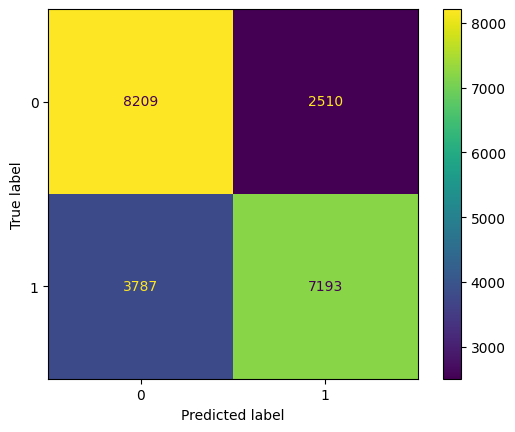

In [140]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred_forest))
cm_forest = confusion_matrix(y_test, y_pred_forest)
ConfusionMatrixDisplay(cm_forest).plot()

## KNN

In [141]:
classifier_KNN = GridSearchCV(estimator=pipe_knn, param_grid = param_grid_knn, cv=5, scoring="accuracy")
classifier_KNN.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25, 26, 27,
                                                               28, 29, 30, ...]},
             scoring='accuracy')

In [142]:
classifier_KNN.best_estimator_.get_params() # k = ???????????

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=36))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=36),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 36,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [143]:
y_pred_knn = classifier_KNN.predict(X_test)

              precision    recall  f1-score   support

           0       0.69      0.79      0.74     10719
           1       0.76      0.66      0.71     10980

    accuracy                           0.72     21699
   macro avg       0.73      0.72      0.72     21699
weighted avg       0.73      0.72      0.72     21699



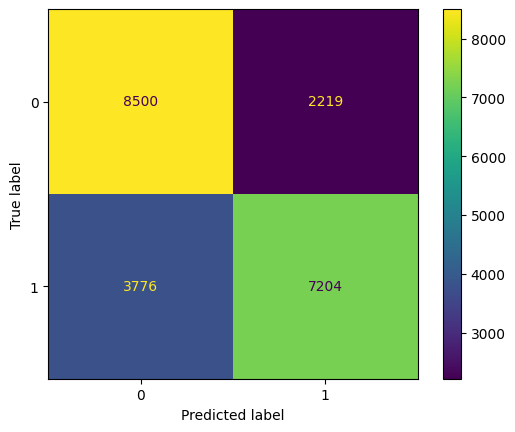

In [144]:
y_pred_knn = classifier_KNN.predict(X_test)
print(classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn).plot()

## log

In [145]:
classifier_log = GridSearchCV(estimator=pipe_log, param_grid=param_grid_log, cv=5, scoring="accuracy")
classifier_log.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'logisticregression__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')

In [146]:
classifier_log.best_estimator_.get_params() # k = ???????????

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(l1_ratio=0.47368421052631576, max_iter=10000,
                      penalty='elasticnet', solver='saga'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(l1_ratio=0.47368421052631576, max_iter=10000,
                    penalty='elasticnet', solver='saga'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': 0.47368421052631576,
 'logisticregression__max_iter': 10000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'elasticnet',
 'logisticregression__random_state': None,
 'logisticre

In [147]:
y_pred_log = classifier_log.predict(X_test)

              precision    recall  f1-score   support

           0       0.69      0.81      0.74     10719
           1       0.77      0.64      0.70     10980

    accuracy                           0.72     21699
   macro avg       0.73      0.72      0.72     21699
weighted avg       0.73      0.72      0.72     21699



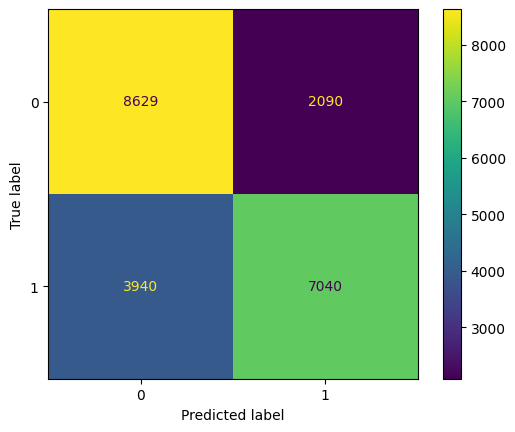

In [148]:
print(classification_report(y_test, y_pred_log))
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log).plot()

# encod_df_2

In [149]:
X, y = encod_df_2.drop("cardio", axis=1), encod_df_2["cardio"]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.33, random_state=42)

# scaler = StandardScaler()

# pipe_forest = make_pipeline(scaler, RandomForestClassifier())
# pipe_knn = make_pipeline(scaler, KNeighborsClassifier())
# pipe_log = make_pipeline(scaler, LogisticRegression(solver="saga", max_iter=10000, penalty="elasticnet", multi_class="auto"))

# param_grid_forest = {"randomforestclassifier__n_estimators": list(range(50, 200, 10))} 
# param_grid_knn = {"kneighborsclassifier__n_neighbors": list(range(1, 20))}
# param_grid_log = {"logisticregression__l1_ratio": np.linspace(0, 1, 20)}

## forest

In [150]:
classifier_forest_2 = GridSearchCV(estimator=pipe_forest, param_grid = param_grid_forest, cv=5, scoring="accuracy")
classifier_forest_2.fit(X_train_2, y_train_2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__n_estimators': [50, 60, 70,
                                                                  80, 90, 100,
                                                                  110, 120, 130,
                                                                  140, 150, 160,
                                                                  170, 180,
                                                                  190]},
             scoring='accuracy')

In [151]:
classifier_forest_2.best_estimator_.get_params() # k = ???????????

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier(n_estimators=170))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(n_estimators=170),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__monotonic_cst': None,
 'random

In [152]:
y_pred_forest_2 = classifier_forest_2.predict(X_test_2)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68     10719
           1       0.69      0.69      0.69     10980

    accuracy                           0.68     21699
   macro avg       0.68      0.68      0.68     21699
weighted avg       0.68      0.68      0.68     21699



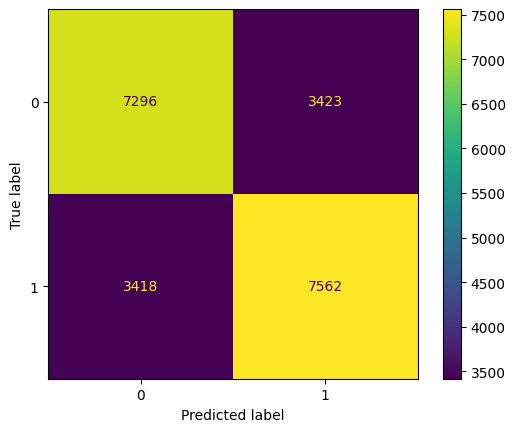

In [153]:
print(classification_report(y_test, y_pred_forest_2))
cm_forest_2 = confusion_matrix(y_test_2, y_pred_forest_2)
ConfusionMatrixDisplay(cm_forest_2).plot()

## KNN

In [154]:
classifier_knn_2 = GridSearchCV(estimator=pipe_knn, param_grid = param_grid_knn, cv=5, scoring="accuracy")
classifier_knn_2.fit(X_train_2, y_train_2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25, 26, 27,
                                                               28, 29, 30, ...]},
             scoring='accuracy')

In [155]:
classifier_knn_2.best_estimator_.get_params() # k = ???????????

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=49))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=49),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 49,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [156]:
y_pred_knn_2 = classifier_knn_2.predict(X_test_2)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     10719
           1       0.76      0.68      0.72     10980

    accuracy                           0.73     21699
   macro avg       0.73      0.73      0.73     21699
weighted avg       0.73      0.73      0.73     21699



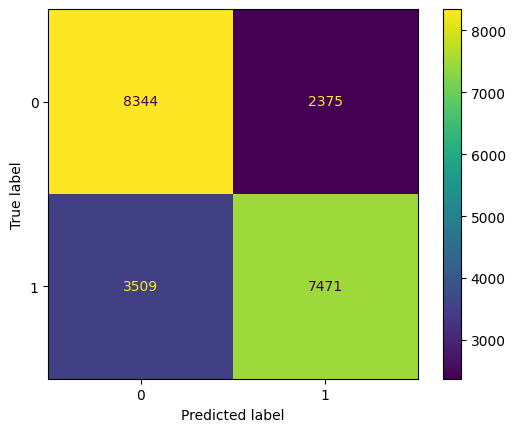

In [157]:
print(classification_report(y_test_2, y_pred_knn_2))
cm_knn_2 = confusion_matrix(y_test_2, y_pred_knn_2)
ConfusionMatrixDisplay(cm_knn_2).plot()

## log

In [158]:
classifier_log_2 = GridSearchCV(estimator=pipe_log, param_grid=param_grid_log, cv=5, scoring="accuracy")
classifier_log_2.fit(X_train_2, y_train_2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'logisticregression__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')

In [159]:
classifier_log_2.best_estimator_.get_params() # k = ???????????

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(l1_ratio=0.0, max_iter=10000, penalty='elasticnet',
                      solver='saga'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(l1_ratio=0.0, max_iter=10000, penalty='elasticnet',
                    solver='saga'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': 0.0,
 'logisticregression__max_iter': 10000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'elasticnet',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'saga',
 'logisticregression_

In [160]:
y_pred_log_2 = classifier_log_2.predict(X_test_2)

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10719
           1       0.76      0.66      0.71     10980

    accuracy                           0.73     21699
   macro avg       0.73      0.73      0.73     21699
weighted avg       0.73      0.73      0.72     21699



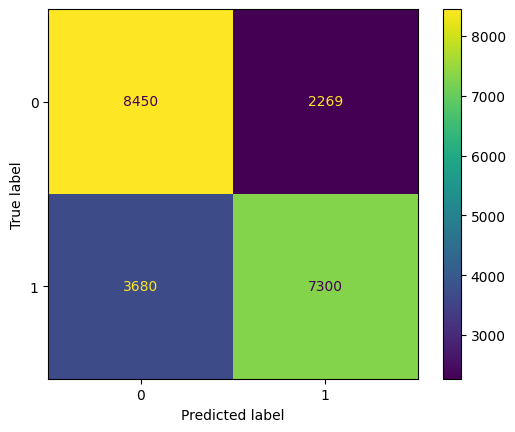

In [161]:
print(classification_report(y_test_2, y_pred_log_2))
cm_log_2 = confusion_matrix(y_test_2, y_pred_log_2)
ConfusionMatrixDisplay(cm_log_2).plot()

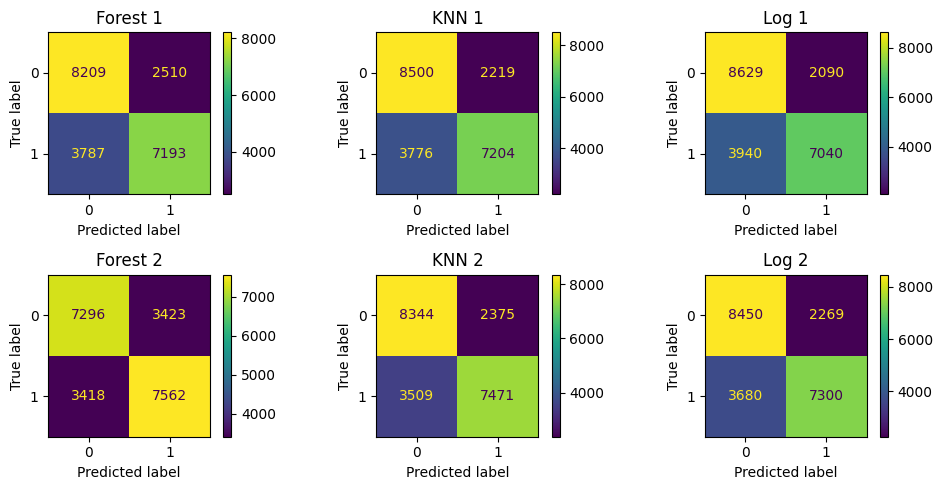

In [163]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# Plotta förväxlingsmatriserna på varsin subplot
disp1 = ConfusionMatrixDisplay(cm_forest)
disp1.plot(ax=axs[0, 0])
axs[0, 0].set_title('Forest 1')

disp2 = ConfusionMatrixDisplay(cm_knn)
disp2.plot(ax=axs[0, 1])
axs[0, 1].set_title('KNN 1')

disp3 = ConfusionMatrixDisplay(cm_log)
disp3.plot(ax=axs[0, 2])
axs[0, 2].set_title('Log 1')

# df_22222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222
disp1 = ConfusionMatrixDisplay(cm_forest_2)
disp1.plot(ax=axs[1, 0])
axs[1, 0].set_title('Forest 2')

disp2 = ConfusionMatrixDisplay(cm_knn_2)
disp2.plot(ax=axs[1, 1])
axs[1, 1].set_title('KNN 2')

disp3 = ConfusionMatrixDisplay(cm_log_2)
disp3.plot(ax=axs[1, 2])
axs[1, 2].set_title('Log 2')
# Justera layout
plt.tight_layout()

# Visa plotten
plt.show()